In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from rdkit import Chem
from rdkit.Chem import AllChem, Descriptors
import os
os.chdir("..")
os.chdir("Preprocessing")
from preprocessing import *
import selfies as sf

#Ensemble learning and random forest

df = preprocessing(r'C:\Users\Gilbert\Documents\BCB_Research\Kcat_Benchmark_ML_Models\Data\kcat_transferase.csv')
amino_encoding = pd.read_csv("C:\\Users\Gilbert\Documents\BCB_Research\Kcat_Benchmark_ML_Models\Data\encoded_amino.csv")

In [ ]:
print(df.columns)

In [13]:
df = pd.DataFrame(df)
df.head()

,2.1.1.1,Homo sapiens,C1=CC(=CN=C1)C(=O)N,Nicotinamide,MESGFTSKDTYLSHFNPRDYLEKYYKFGSRHSAESQILKHLLKNLFKIFCLDGVKGDLLIDIGSGPTIYQLLSACESFKEIVVTDYSDQNLQELEKWLKKEPEAFDWSPVVTYVCDLEGNRVKGPEKEEKLRQAVKQVLKCDVTQSQPLGAVPLPPADCVLSTLCLDAACPDLPTYCRALRNLGSLLKPGGFLVIMAALKSSYYMIGEQKFSSLPLGREAVEAAVKEAGYTIEWFEVISQSYSSTMANNEGLFSLVARKLSRPL,0.036,s^(-1)
0,2.1.1.1,Homo sapiens,C1=CC(=CN=C1)C(=O)N,Nicotinamide,MESGFTSKDTYLSHFNPRDFLEKYYKFGSRHSAESQILKHLLKNLF...,0.0410,s^(-1)
1,2.1.1.1,Homo sapiens,C1=CC(=CN=C1)C(=O)N,Nicotinamide,MESGFTSKDTYLSHFNPRDYLEKYYKFGSRHSAESQILKHLLKNLF...,1.0200,s^(-1)
2,2.1.1.1,Homo sapiens,C1=CC(=CN=C1)C(=O)N,Nicotinamide,MESGFTSKDTYLSHFNPRDYLEKYYKFGSRHSAESQILKHLLKNLF...,0.0830,s^(-1)
3,2.1.1.10,Brassica oleracea,C(CS)C(C(=O)O)N,L-Homocysteine,MGLEKKSALLEDLIEKCGGCAVVDGGFATQLEIHGAAINDPLWSAV...,0.0375,s^(-1)
4,2.1.1.10,Escherichia coli,C(CS)C(C(=O)O)N,L-Homocysteine,MSQNNPLRALLDKQDILLLDGAMATELEARGCNLADSLWSAKVLVE...,0.3800,s^(-1)


In [16]:
df.shape

(4136, 7)

In [2]:
d = df.copy()

d.head()

data = d

In [ ]:
# data = df.copy()
# import pandas as pd
# import numpy as np

# # Sample data

# # Determine vocabulary
# all_smiles = "".join(df["Compound"].tolist())
# vocab = sorted(set(all_smiles))
# vocab_size = len(vocab)

# # Mapping from character to index and vice-versa
# char_to_index = {char: idx for idx, char in enumerate(vocab)}
# index_to_char = {idx: char for char, idx in char_to_index.items()}

# # One-hot encoding function
# def one_hot_encode(smiles_string):
#     # Tokenize the SMILES string
#     tokens = list(smiles_string)
#     # Initialize a matrix for one-hot encoding: len(tokens) x vocab_size
#     one_hot = np.zeros(vocab_size, dtype=int)
#     for token in tokens:
#         one_hot[char_to_index[token]] = 1
#     return one_hot

# # Apply one-hot encoding to each SMILES string
# encoded_data = np.stack(df["Compound"].apply(one_hot_encode).to_numpy())

# # Convert the encoded data to a DataFrame
# one_hot_df = pd.DataFrame(encoded_data, columns=vocab)

# data["Kcat"] = np.log10(data["Kcat"])  # Applying log(x + 1) to handle zeros

# # Rename columns using list comprehension as provided
# fixed_columns = [col.replace('[', '_').replace(']', '_').replace('<', '_').replace('>', '_').replace('#', 'hash_') for col in one_hot_df.columns]

# # Append an incrementing index to duplicate column names to make them unique
# seen = {}
# final_columns = []
# for col in fixed_columns:
#     if col in seen:
#         seen[col] += 1
#         final_columns.append(f"{col}_{seen[col]}")
#     else:
#         seen[col] = 1
#         final_columns.append(col)

# one_hot_df.columns = final_columns


In [ ]:
encoded_df = pd.read_csv("C:\\Users\Gilbert\Documents\BCB_Research\Kcat_Benchmark_ML_Models\Data\encoded_amino.csv")


In [3]:
# Assuming encoded_df is your one-hot encoded data from before
amino_pca = PCA(n_components=433)
principal_components = amino_pca.fit_transform(amino_encoding)

# Convert to DataFrame for convenience
amino_pca_df = pd.DataFrame(data=principal_components)

In [4]:
data.head()

,EC_number,Species,Compound,Compound_name,Amino_encoding,Kcat,unit
0,2.1.1.1,Homo sapiens,C1=CC(=CN=C1)C(=O)N,Nicotinamide,MESGFTSKDTYLSHFNPRDFLEKYYKFGSRHSAESQILKHLLKNLF...,0.0410,s^(-1)
1,2.1.1.1,Homo sapiens,C1=CC(=CN=C1)C(=O)N,Nicotinamide,MESGFTSKDTYLSHFNPRDYLEKYYKFGSRHSAESQILKHLLKNLF...,1.0200,s^(-1)
2,2.1.1.1,Homo sapiens,C1=CC(=CN=C1)C(=O)N,Nicotinamide,MESGFTSKDTYLSHFNPRDYLEKYYKFGSRHSAESQILKHLLKNLF...,0.0830,s^(-1)
3,2.1.1.10,Brassica oleracea,C(CS)C(C(=O)O)N,L-Homocysteine,MGLEKKSALLEDLIEKCGGCAVVDGGFATQLEIHGAAINDPLWSAV...,0.0375,s^(-1)
4,2.1.1.10,Escherichia coli,C(CS)C(C(=O)O)N,L-Homocysteine,MSQNNPLRALLDKQDILLLDGAMATELEARGCNLADSLWSAKVLVE...,0.3800,s^(-1)


In [ ]:
#preprocessing
#lets encode the data using label encoder 
label_encoder = LabelEncoder()
data["EC_number"] = label_encoder.fit_transform(data["EC_number"])
data["Species"] = label_encoder.fit_transform(data["Species"])

amino_acids = 'ACDEFGHIKLMNPQRSTVWY'
amino_to_index = {amino: i for i, amino in enumerate(amino_acids)}

# Convert amino acid sequences to one-hot encoding
def convert_to_one_hot(sequence, max_length):
    one_hot_sequence = np.zeros((max_length, len(amino_acids)))
    
    for i, amino in enumerate(sequence):
        if amino in amino_to_index:
            index = amino_to_index[amino]
            one_hot_sequence[i, index] = 1
            
    return one_hot_sequence.flatten()

# Determine the maximum sequence length
max_sequence_length = max(len(seq) for seq in data["Amino_encoding"])

# Apply the conversion to the DataFrame column
data["Amino"] = data["Amino_encoding"].apply(lambda seq: convert_to_one_hot(seq, max_sequence_length)).tolist()

# convert compound name into numbers.
compound = data["Compound"]

data["smiles"] = [Chem.MolFromSmiles(smiles) for smiles in compound]

mol = data["smiles"]

def smiles_to_morgan_fingerprint(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=1024)
        return fingerprint
    else:
        return None

# Apply logarithmic transformation to 'Kcat'
data["Kcat"] = np.log10(data["Kcat"])  # Applying log(x + 1) to handle zeros


# add molecular weights as a feature

def molecular_weight(compound):
    mol = Chem.MolFromSmiles(compound)
    if mol:
        return Descriptors.MolWt(mol)
    else:
        return none

data["Molecular_Weight"] = data["Compound"].apply(molecular_weight)

#apply log to molecular weight because it is not well distributed

data["Molecular_Weight"] = np.log10(data['Molecular_Weight'])


# add logP values
# Polar Surface Area
# Amino Acid features

# data.drop(columns=["Compound_name", "Amino_encoding","unit"], inplace=True)



In [ ]:
hydro.head()

# data["Morgan_fingerprint"] = data["Compound"].apply(smiles_to_morgan_fingerprint)

In [ ]:
data_features = data.copy()

data_features.drop(columns=["Kcat", "Amino"], inplace=True)

In [ ]:
hydration_energy =  hydro["Hydration_energy"]
data_hydration_energy = pd.DataFrame(hydration_energy)

In [ ]:
final_df = pd.concat([data["Kcat"],data_hydration_energy, encoded_df], axis=1)

In [ ]:
final_df.dropna(subset=['Hydration_energy'], inplace=True)
final_df["Kcat"] = np.log10(final_df["Kcat"]) 

In [2]:
# List of numerical features
numerical_features = ['smiles_atoms_count', 'smiles_rings_count', 'smiles_bonds_count', 'sequence_length', 'atom_seq_interaction']

# List of k-mer features
kmer_features = [col for col in df.columns if 'kmer_2_' in col or 'kmer_3_' in col]

# Combine lists to get all relevant features
all_features = numerical_features + kmer_features

In [3]:
df.drop(columns=["kmer_3_4985"], inplace=True)

In [4]:
all_features.remove("kmer_3_4985")

In [7]:
if "kmer_3_4985" in df.columns:
    print("Feature is still in DataFrame")
else:
    print("Feature has been removed from DataFrame")

Feature has been removed from DataFrame


In [5]:
from sklearn.model_selection import train_test_split

x = amino_pca_df
y = np.log10(df["Kcat"])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [6]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

# Check data types
print("x_train data type:", type(x_train))
print("y_train data type:", type(y_train))



x_train shape: (3308, 433)
y_train shape: (3308,)
x_train data type: <class 'pandas.core.frame.DataFrame'>
y_train data type: <class 'pandas.core.series.Series'>


In [7]:
# this initialization of the regression model
rf_regressor = RandomForestRegressor()

rf_regressor.fit(x_train, y_train)

y_pred = rf_regressor.predict(x_test)

In [ ]:
print()

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
result = np.corrcoef(y_test, y_pred)[0,1]
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred)) 
print('r2:', r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(mse))
print("pearson:", result)


MAE:  0.6329528228338345
MSE:  0.8853820930469697
r2: 0.6670437040584267
RMSE: 0.9409474443596569
pearson: 0.8177994513543322


In [ ]:
# Feature importance
feature_importances = rf_regressor.feature_importances_

import matplotlib.pyplot as plt
# Plot feature importances
plt.figure(figsize=(10, 6))
sorted_idx = feature_importances.argsort()[-10:]  # Top 10 features
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [all_features[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Top 10 Most Important Features')
plt.show()

In [10]:
from sklearn.metrics import r2_score

# Initialize and fit the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x, y)

# Get feature importances and feature names
importances = rf.feature_importances_
feature_names = x.columns

# Sort features by importance
sorted_idx = np.argsort(importances)

# Iteratively remove the least important feature and retrain
for i in range(len(sorted_idx)):
    # Drop least important feature
    X_reduced = x.drop(columns=[feature_names[sorted_idx[i]]])
    
    # Refit the model
    rf.fit(X_reduced, y)
    
    # Make predictions and get R^2 score
    y_pred = rf.predict(X_reduced)
    r2_reduced = r2_score(y, y_pred)
    
    print(f"R^2 score after removing feature '{feature_names[sorted_idx[i]]}': {r2_reduced}")


KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import GridSearchCV

# helps finding the optimal hyperparameters
param_grid = {
    'n_estimators': [100,200,250],
    'max_depth': [1, 10, 20]
    # Add more hyperparameters and values
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=param_grid, cv=3)
grid_search.fit(x_train, y_train)

best_rf_regressor = grid_search.best_estimator_

In [ ]:
grid_search.score(x_train, y_train)

In [9]:
# Create a random forest regressor

from sklearn.model_selection import learning_curve


regressor = RandomForestRegressor(random_state=42)

# Create learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    regressor, x_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation of scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="r",
)
plt.fill_between(
    train_sizes,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.1,
    color="g",
)
plt.plot(
    train_sizes, train_scores_mean, "o-", color="r", label="Training score"
)
plt.plot(
    train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
)

plt.legend(loc="best")
plt.show()


KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt

estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    rf_regressor.set_params(n_estimators=n)
    rf_regressor.fit(x_train, y_train)
    scores.append(rf_regressor.score(x_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

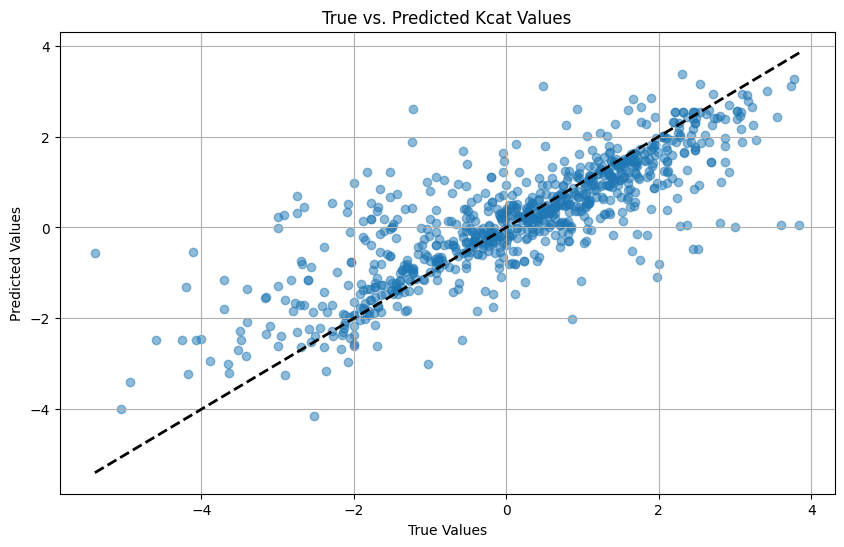

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Kcat Values')
plt.grid(True)
plt.show()

In [ ]:
import numpy as np

pearson_corr = np.corrcoef(y_pred, y_test)[0, 1]
print(f"Pearson correlation coefficient: {pearson_corr:.3f}")